Chapter 3 Linear Regression, Question 10

In [2]:
library(ISLR)

In [3]:
Carseats = na.omit(Carseats)
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

# (a)

In [4]:
lm.model = lm(Sales~Price+Urban+US,data=Carseats)
summary(lm.model)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


# (b)

The coefficient of Price variable is statistically significant given its very small p-value. On average each $100 increase in the price decreases the sales by around 5 units.
There are two dummy variables for the qualitative variables Urban and US which are UrabnYes and USYes respectively.
UrbanYes = 1 if the Carseats' store is in an Urban area and 0 otherwise.
USYes = 1 if the Carseats' store is in US and 0 otherwise.
The p-value for the t-statistic of the coefficient of UrbanYes variable is larger than the presumed 5% critical point. Hence this coefficient is statistically insignificant. This indicates that there is no relationship between the sales of the carseats and whether the store is an urban area or not.
However the p-value of that of USYes variable is a lot smaller than the 5% critical point and hence the coefficient of this variable is statistically significant. Also the coefficient is positive which means that the sales are more in the US stores by around 1201 units.

# (c)

Sales = 13.04 - 0.054 Price - 0.022 UrbanYes + 1.2 USYes

# (d)

For Price and USYes we can reject the null hypothesis that their coefficents are equal to 0 as the respective p-values of their t-statistic are very low.

# (e)

In [5]:
lm.model_small = lm(Sales~Price+US,data=Carseats)
summary(lm.model_small)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


# (f)

In [6]:
anova(lm.model,lm.model_small)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
396,2420.835,NA,NA,NA,NA
397,2420.874,-1,-0.03979039,0.00650891,0.9357389


According to the anova test the p-value of the f-statistic is larger than 5%. Therefore the null hypothesis stands true that both the models fit the data equally well.

# (g)

In [7]:
confint(lm.model_small, level=0.95)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


# (h)

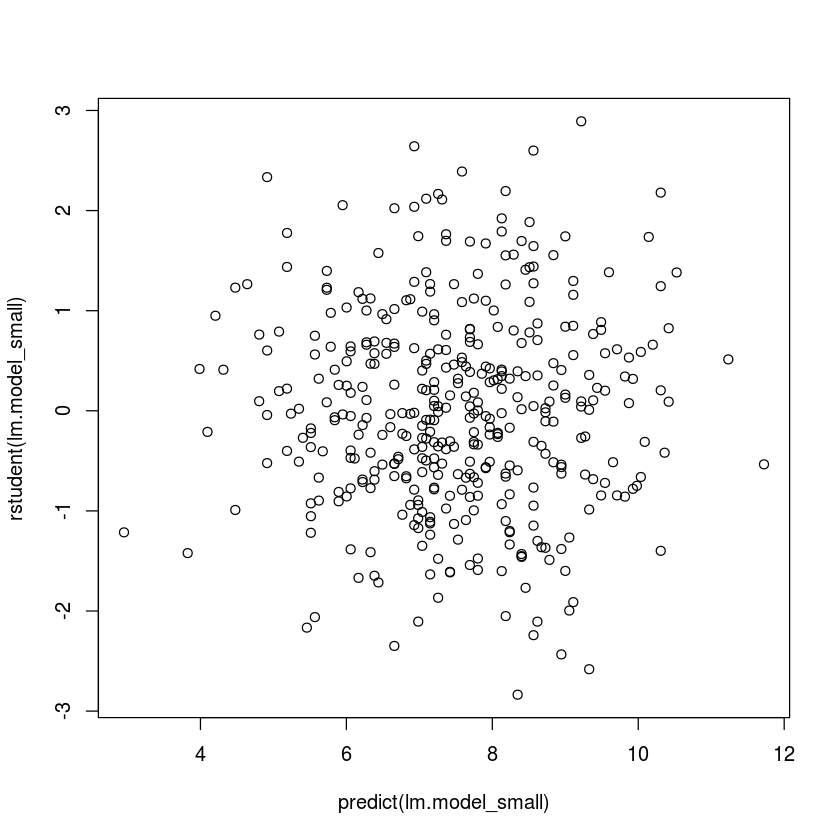

In [8]:
plot(predict(lm.model_small),rstudent(lm.model_small))

As the studentized residuals are between -3 and 3 we can assume there are no outliers.

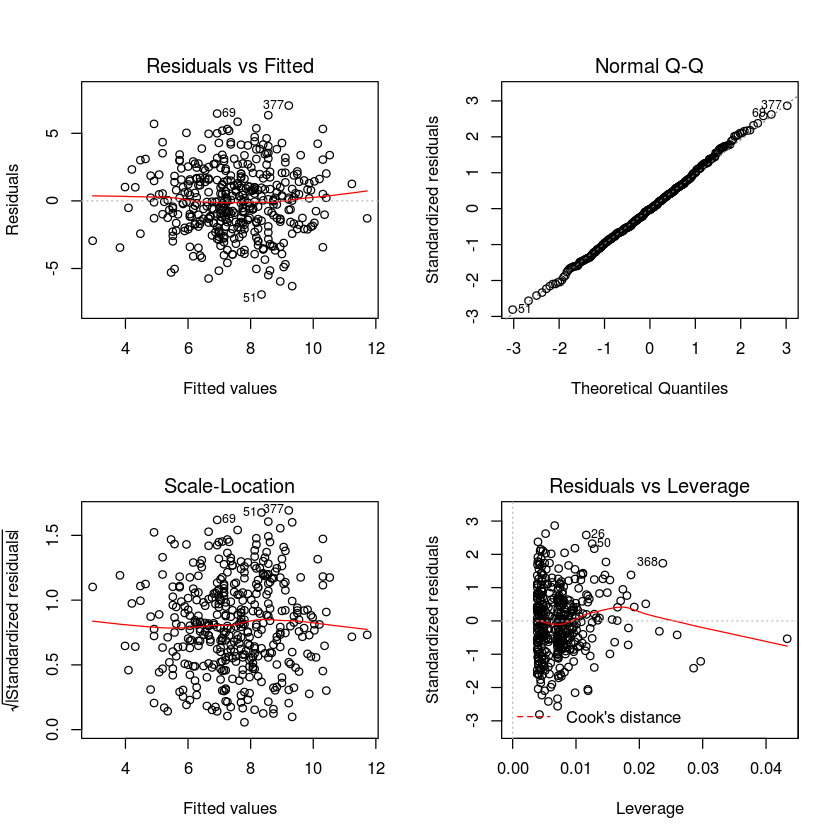

In [9]:
par(mfrow=c(2,2))
plot(lm.model_small)

Studentized residuals vs Leverage graph shows that there are some observations with high leverage.

In [10]:
p=2
n=nrow(Carseats)
(p+1)/n

[1] 0.0075

There are many observations with leverage way above 0.0075. All of those observations have very high leverage.